project proposal

markdown

In [27]:
library(tidyverse)
install.packages("archive")
library(archive)
options(repr.matrix.max.rows = 6)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [28]:
url_ <- "https://archive.ics.uci.edu/static/public/109/wine.zip"
destination <- "data/wine.zip"
download.file(url_, destination)
outdir <- "data/unzip"
unzip("data/wine.zip", exdir = outdir)

Rows: 178 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,13.74475,2.010678,2.455593,17.03729,106.3390,2.840169,2.9823729,0.290000,1.899322,5.528305,1.0620339,3.157797,1115.7119
2,12.27873,1.932676,2.244789,20.23803,94.5493,2.258873,2.0808451,0.363662,1.630282,3.086620,1.0562817,2.785352,519.5070
3,13.15375,3.333750,2.437083,21.41667,99.3125,1.678750,0.7814583,0.447500,1.153542,7.396250,0.6827083,1.683542,629.8958


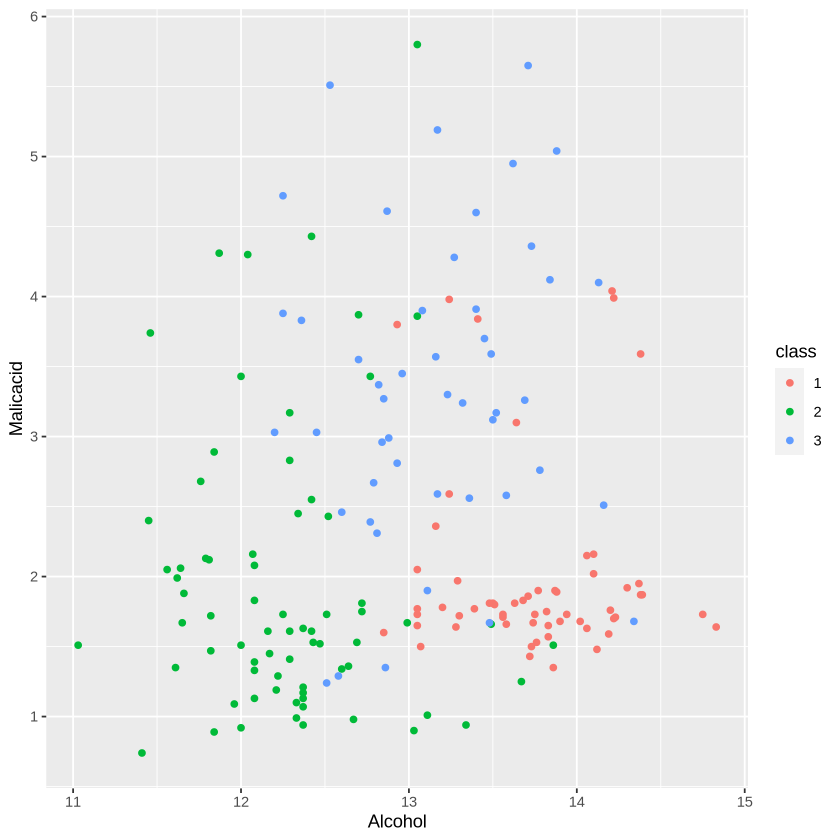

In [39]:
wine_data <- read_delim("data/unzip/wine.data", delim = ",", col_name = FALSE)|>
             mutate(X1 = as_factor(X1))
colnames(wine_data) <- c('class', 'Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 
                         'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue','0D280_0D315_of_diluted_wines',
                         'Proline')

wine_data

wine_plot <- ggplot(wine_data, aes(x = Alcohol, y = Malicacid, colour = class)) + geom_point()
wine_plot

group_by(wine_data, class)|>
summarize(across(Alcohol:Proline, mean))
